In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.spatial import distance
import mplcyberpunk
plt.style.use("cyberpunk")

In [50]:
file_path = 'billionaires_2023.csv'
file_path2024 = 'billionaires_2024.csv'

# main data
dataset2023 = pd.read_csv(file_path)

dataset_2023_gender = dataset2023.copy()
dataset2023_copy = dataset2023.copy()
dataset2024 = pd.read_csv(file_path2024)
dataset2024['Net Worth'] = dataset2024['Net Worth'].replace({'\$': '', ' B': ''}, regex=True).astype(float) * 1000

In [55]:
# Renaming columns for consistency
dataset2023_copy.rename(columns={'personName': 'Name', 'finalWorth': 'Net Worth 2023'}, inplace=True)
dataset2024.rename(columns={'Name': 'Name', 'Net Worth': 'Net Worth 2024'}, inplace=True)

# Merging the two datasets on the 'Name' column
merged_data = pd.merge(dataset2023_copy[['Name', 'Net Worth 2023']], dataset2024[['Name', 'Net Worth 2024', 'Source']], on='Name', how='inner')

# Calculating the percentage change in net worth
merged_data['Net Worth Change (%)'] = ((merged_data['Net Worth 2024'] - merged_data['Net Worth 2023']) / merged_data['Net Worth 2023']) * 100

# Getting the top 5 winners and losers
top_5_winners = merged_data.sort_values(by='Net Worth Change (%)', ascending=False).head(10)
top_5_losers = merged_data.sort_values(by='Net Worth Change (%)').head(10)

top_5_winners, top_5_losers

(                      Name  Net Worth 2023  Net Worth 2024  \
 485       Prajogo Pangestu            5300         54400.0   
 1309       Brian Armstrong            2200          7600.0   
 2317          Wu Xiangdong            1100          3500.0   
 188    Rick Cohen & family            9600         22200.0   
 517        Alexander Gerko            5000         11500.0   
 722               Li Xiang            3800          8700.0   
 1185           Bill Haslam            2500          5700.0   
 2072  P.V. Ramprasad Reddy            1300          2900.0   
 1877        Frank Slootman            1500          3300.0   
 1113                Zhu Yi            2700          5900.0   
 
                       Source  Net Worth Change (%)  
 485   Petrochemicals, energy            926.415094  
 1309          Cryptocurrency            245.454545  
 2317                  Liquor            218.181818  
 188     Warehouse automation            131.250000  
 517                  Trading      

In [52]:
billionaires_data = pd.read_csv(file_path)

# Cleaning and converting the GDP column to a numeric format
billionaires_data['gdp_country'] = (
    billionaires_data['gdp_country']
    .str.replace('$', '')
    .str.replace(',', '')
    .str.strip()
    .astype(float)
)

# Summing the net worth of billionaires for each country
total_net_worth = billionaires_data.groupby('country')['finalWorth'].sum()

# Getting the unique GDP values for each country
gdp_by_country = billionaires_data.drop_duplicates('country').set_index('country')['gdp_country']

# Merging the total net worth with the GDP of each country
country_wealth_gdp = pd.DataFrame({
    'Total Net Worth (Millions $)': total_net_worth,
    'GDP (Millions $)': gdp_by_country / 1e6  # Converting GDP to millions for consistency
})

# Calculating the percentage of the total net worth of billionaires over the GDP for each country
country_wealth_gdp['Billionaires Wealth as % of GDP'] = (country_wealth_gdp['Total Net Worth (Millions $)'] / country_wealth_gdp['GDP (Millions $)']) * 100

# Displaying the result
print(country_wealth_gdp)

               Total Net Worth (Millions $)  GDP (Millions $)  \
country                                                         
Algeria                              4600.0      1.699882e+05   
Andorra                              1500.0      3.154058e+03   
Argentina                           11000.0      4.496634e+05   
Armenia                              1200.0      1.367280e+04   
Australia                          173500.0      1.392681e+06   
...                                     ...               ...   
United States                     4575100.0      2.142770e+07   
Uruguay                              1800.0      5.604591e+04   
Uzbekistan                          14400.0      5.792129e+04   
Vietnam                             12600.0      2.619212e+05   
NaN                                     NaN               NaN   

               Billionaires Wealth as % of GDP  
country                                         
Algeria                               2.706070  
Andorra

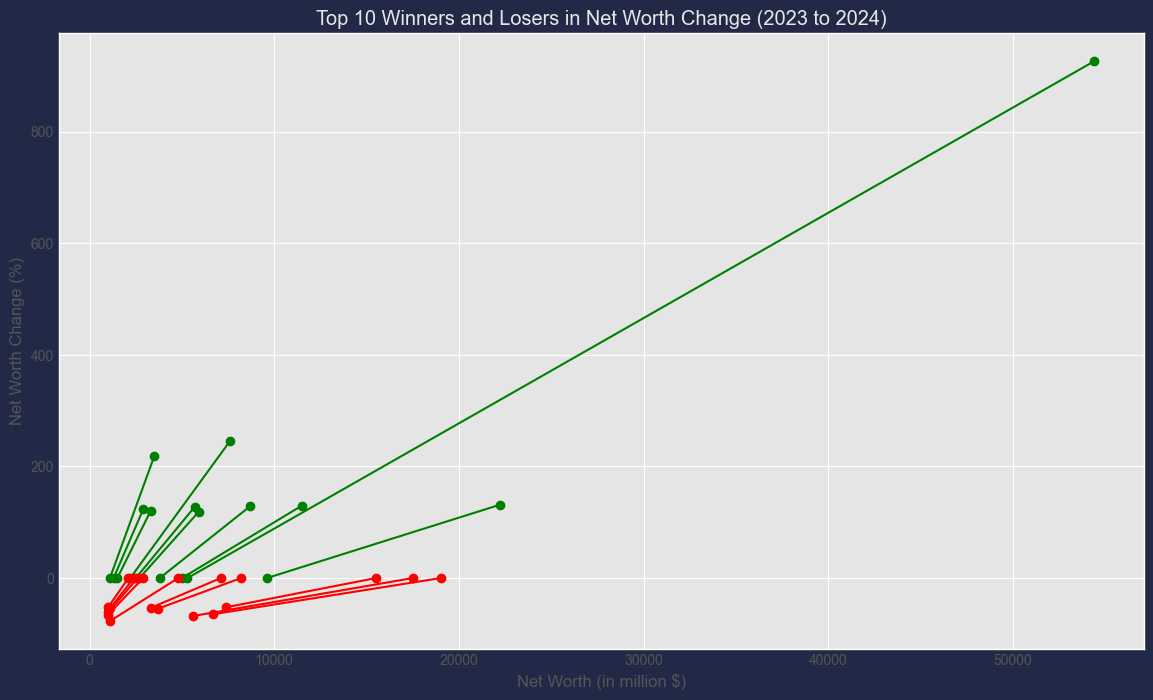

In [56]:
# Selecting the top 10 winners and top 10 losers
top_10_winners = merged_data.sort_values(by='Net Worth Change (%)', ascending=False).head(10)
top_10_losers = merged_data.sort_values(by='Net Worth Change (%)').head(10)

# Combining the winners and losers for the plot
top_10_winners_and_losers = pd.concat([top_10_winners, top_10_losers])

# Creating the plot
plt.figure(figsize=(14, 8))
plt.style.use('ggplot')  # Using ggplot style for better visuals


top_10_winners_and_losers['Color'] = ['green' if x >= 0 else 'red' for x in top_10_winners_and_losers['Net Worth Change (%)']]

# Plotting for each billionaire in the top 10 winners and losers
for _, row in top_10_winners_and_losers.iterrows():
    plt.plot([row['Net Worth 2023'], row['Net Worth 2024']],
             [0, row['Net Worth Change (%)']],
             color=row['Color'], marker='o')

plt.title('Top 10 Winners and Losers in Net Worth Change (2023 to 2024)')
plt.xlabel('Net Worth (in million $)')
plt.ylabel('Net Worth Change (%)')
plt.grid(True)

# Show the plot
plt.show()

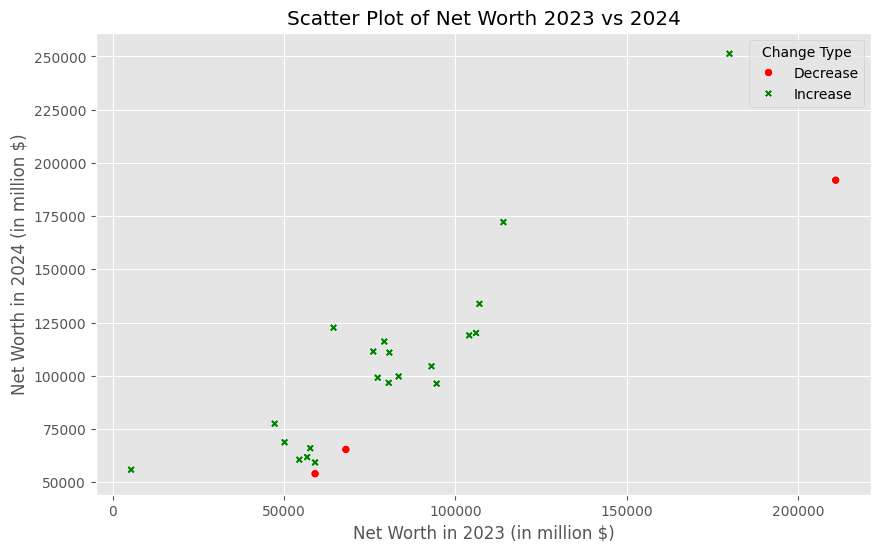

In [7]:
merged_data['Change Type'] = merged_data['Net Worth Change (%)'].apply(lambda x: 'Increase' if x >= 0 else 'Decrease')

# Scatter Plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=merged_data, x='Net Worth 2023', y='Net Worth 2024', hue='Change Type',
                          style='Change Type', palette={"Increase": "green", "Decrease": "red"})
plt.title('Scatter Plot of Net Worth 2023 vs 2024')
plt.xlabel('Net Worth in 2023 (in million $)')
plt.ylabel('Net Worth in 2024 (in million $)')
plt.grid(True)

# Show the plot
plt.show()

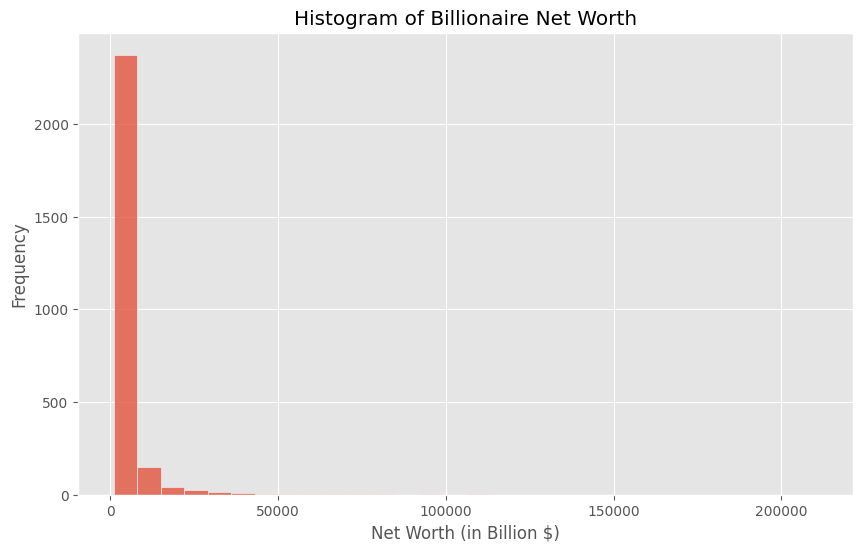

/var/folders/p5/9pt_428x1_58kc40jyglstlh0000gn/T/ipykernel_52254/1733019969.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset2023['finalWorth'], shade=True)


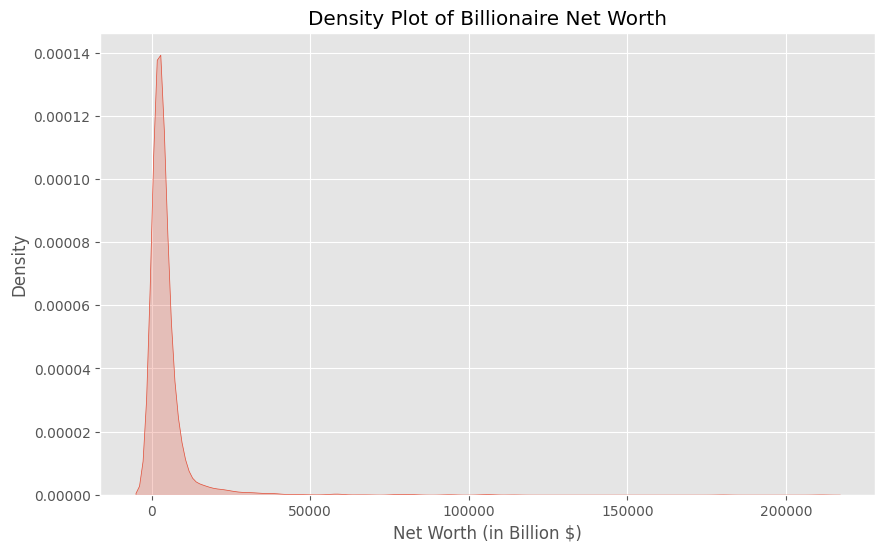

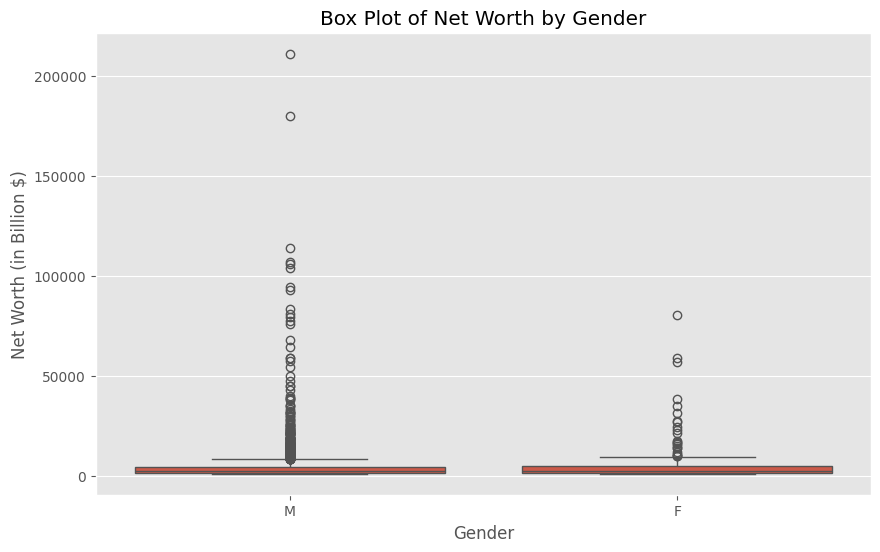

Skewness: 10.012367321086751, Kurtosis: 145.07368067526582


In [8]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset2023['finalWorth'], kde=False, bins=30)
plt.title('Histogram of Billionaire Net Worth')
plt.xlabel('Net Worth (in Billion $)')
plt.ylabel('Frequency')
plt.show()

# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(dataset2023['finalWorth'], shade=True)
plt.title('Density Plot of Billionaire Net Worth')
plt.xlabel('Net Worth (in Billion $)')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='finalWorth', data=dataset2023)
plt.title('Box Plot of Net Worth by Gender')
plt.xlabel('Gender')
plt.ylabel('Net Worth (in Billion $)')
plt.show()

# Skewness and Kurtosis
skewness = dataset2023['finalWorth'].skew()
kurtosis = dataset2023['finalWorth'].kurtosis()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")


In [9]:
# Assuming 'dataset' is your DataFrame name
billionaire_count_by_country = dataset2023.groupby('country')['personName'].count().reset_index()
billionaire_count_by_country.rename(columns={'personName': 'BillionaireCount'}, inplace=True)

# Extracting necessary country-specific data (assuming the first occurrence of each country has the relevant data)
country_specific_data = dataset2023.drop_duplicates(subset='country')[['country', 'gdp_country', 'population_country']]
country_specific_data.rename(columns={'gdp_country': 'GDP', 'population_country': 'Population'}, inplace=True)

# Calculate the total net worth of billionaires for each country (in billions)
billionare_worth_per_country = dataset2023.groupby('country')['finalWorth'].sum().reset_index()
billionare_worth_per_country['finalWorth'] = billionare_worth_per_country['finalWorth'] / 1000  # Convert from millions to billions
billionare_worth_per_country.rename(columns={'finalWorth': 'TotalNetWorthBillion'}, inplace=True)

# Merging the billionaire count with country-specific data
adjusted_dataset_2023 = billionaire_count_by_country.merge(country_specific_data, on='country', how='left')

# Merging the total net worth data with the adjusted_dataset_2023
adjusted_dataset_2023 = adjusted_dataset_2023.merge(billionare_worth_per_country, on='country', how='left')

# Convert GDP to numeric value and calculate the GDP per capita
adjusted_dataset_2023['GDP'] = adjusted_dataset_2023['GDP'].replace({'\$': '', ',': ''}, regex=True).astype(float)
adjusted_dataset_2023['Population'] = adjusted_dataset_2023['Population'].replace({',': ''}, regex=True).astype(float)
adjusted_dataset_2023['GDP per Capita'] = adjusted_dataset_2023['GDP'] / adjusted_dataset_2023['Population']

# Calculate the percentage of GDP that the total billionaire net worth represents for each country
adjusted_dataset_2023['PercentageOfGDP'] = (adjusted_dataset_2023['TotalNetWorthBillion'] * 1e9) / adjusted_dataset_2023['GDP'] * 100

# Displaying the merged data with the percentage of GDP
adjusted_dataset_2023[['country', 'BillionaireCount', 'TotalNetWorthBillion', 'GDP', 'Population', 'GDP per Capita', 'PercentageOfGDP']]


,country,BillionaireCount,TotalNetWorthBillion,GDP,Population,GDP per Capita,PercentageOfGDP
0,Algeria,1,4.6,1.699882e+11,43053054.0,3948.343279,2.706070
1,Andorra,1,1.5,3.154058e+09,77142.0,40886.391162,47.557781
2,Argentina,4,11.0,4.496634e+11,44938712.0,10006.148974,2.446274
3,Armenia,1,1.2,1.367280e+10,2957731.0,4622.733493,8.776548
4,Australia,43,173.5,1.392681e+12,25766605.0,54049.828812,12.457989
...,...,...,...,...,...,...,...
73,United Kingdom,82,370.7,2.827113e+12,66834405.0,42300.267126,13.112315
74,United States,754,4575.1,2.142770e+13,328239523.0,65280.682241,21.351335
75,Uruguay,1,1.8,5.604591e+10,3461734.0,16190.126957,3.211653
76,Uzbekistan,1,14.4,5.792129e+10,33580650.0,1724.841134,24.861326


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Assume 'data' is your combined and cleaned DataFrame
# Selecting features and target variable
X = dataset2024[['Country', 'Source', 'Age']].notna()
y = dataset2024['Net Worth 2024']

# Preprocessing
categorical_features = ['Country', 'Source']
numerical_features = ['Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Model
model = make_pipeline(preprocessor, DecisionTreeRegressor())

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))


NameError: name 'dataset2024' is not defined

In [11]:
# Recalculating the percentage of self-made billionaires for both males and females
# as the previous cell might not carry over the variable states

# Create a function to calculate the percentages to avoid repetition
def calculate_self_made_percentage(data):
    self_made_count = data[data['selfMade']].shape[0]
    total_count = data.shape[0]
    self_made_percentage = (self_made_count / total_count) * 100
    inherited_percentage = 100 - self_made_percentage
    return [self_made_percentage, inherited_percentage]

# Calculate percentages for male and female billionaires
male_percentages = calculate_self_made_percentage(male_data)
female_percentages = calculate_self_made_percentage(female_data)

# Define some fancy colors and explode parameters for the pie charts
colors = ['#FFD700', '#E5E4E2']  # Gold and silver colors
explode = (0.1, 0)  # 'explode' a slice if it's self-made

# Creating pie charts for the percentage of self-made billionaires by gender
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Male pie chart
axes[0].pie(
    male_percentages,
    explode=explode,
    labels=['Self Made', 'Inherited'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Male Billionaires')

# Female pie chart
axes[1].pie(
    female_percentages,
    explode=explode,
    labels=['Self Made', 'Inherited'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)
axes[1].set_title('Female Billionaires')

plt.show()

NameError: name 'male_data' is not defined

In [ ]:
# Filter data based on gender and drop rows with missing 'finalWorth' or 'age'
male_data = dataset_2023_gender[dataset_2023_gender['gender'] == 'M'][['personName', 'finalWorth', 'age', 'selfMade']].dropna()
female_data = dataset_2023_gender[dataset_2023_gender['gender'] == 'F'][['personName', 'finalWorth', 'age', 'selfMade']].dropna()

# Creating a 2x1 subplot matrix with log scale for net worth on the x-axis
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Define a color map for self-made status
color_map = {True: 'green', False: 'blue'}

# Plotting male billionaires, color by self-made status
for self_made_status, color in color_map.items():
    subset = male_data[male_data['selfMade'] == self_made_status]
    label = 'Self Made' if self_made_status else 'Inherited'
    axes[0].scatter(subset['finalWorth'], subset['age'], c=color, alpha=0.5, label=label)

# Setting labels and scale for male billionaires
axes[0].set_title('Male Billionaires')
axes[0].set_ylabel('Age')
axes[0].set_xscale('log')
axes[0].set_xlabel('Net Worth (in billions, log scale)')
axes[0].legend()

# Plotting female billionaires, color by self-made status
color_map = {True: 'green', False: 'red'}
for self_made_status, color in color_map.items():
    subset = female_data[female_data['selfMade'] == self_made_status]
    label = 'Self Made' if self_made_status else 'Inherited'
    axes[1].scatter(subset['finalWorth'], subset['age'], c=color, alpha=0.5, label=label)

# Setting labels for female billionaires
axes[1].set_title('Female Billionaires')
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Net Worth (in billions, log scale)')
axes[1].legend()

plt.tight_layout()
plt.show()

: 

In [ ]:
merged_data = adjusted_dataset_2023
merged_data_adjusted = merged_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['BillionaireCount', 'GDP per Capita', 'GDP', 'Population'])
print(merged_data.head())

# We'll conduct a Pearson correlation test between 'BillionaireCount' and 'GDP per Capita'
pearson_corr, p_value = pearsonr(merged_data_adjusted['BillionaireCount'], merged_data_adjusted['GDP per Capita'])
pearson_corr2, p_value2 = pearsonr(merged_data_adjusted['BillionaireCount'], merged_data_adjusted['GDP'])
pearson_corr3, p_value3 = pearsonr(merged_data_adjusted['BillionaireCount'], merged_data_adjusted['Population'])

# Now let's formulate the null and alternative hypotheses:
# Null Hypothesis (H0): There is no relationship between GDP per capita and the number of billionaires in a country.
# Alternative Hypothesis (H1): There is a relationship between GDP per capita and the number of billionaires in a country.

pearson_corr, p_value
print(f"For the first hypothesis testing, which is about the number of billionaires and GDP per capita, Pearson correlation is {pearson_corr:.2f} and p-value is {p_value:.4f}")


pearson_corr2, p_value2
print(f"For the first hypothesis testing, which is about the number of billionaires and GDP, Pearson correlation is {pearson_corr2:.2f} and p-value is {p_value2:.4f}")

pearson_corr3, p_value3
print(f"For the first hypothesis testing, which is about the number of billionaires and Population, Pearson correlation is {pearson_corr3:.2f} and p-value is {p_value3:.4f}")



: 

In [ ]:
selected_columns = merged_data[['BillionaireCount', 'Population']]

# Calculate the mean and covariance matrix
mean = selected_columns.mean()
cov_matrix = selected_columns.cov()

# Calculate the Mahalanobis Distance for each data point
mahalanobis_distances = []
for index, row in selected_columns.iterrows():
    mahalanobis_dist = distance.mahalanobis(row, mean, np.linalg.inv(cov_matrix))
    mahalanobis_distances.append(mahalanobis_dist)

merged_data_with_distance = merged_data.copy()

# Add the Mahalanobis Distance as a new column in the DataFrame

merged_data_with_distance['MahalanobisDistance'] = mahalanobis_distances
sorted_df = merged_data_with_distance[['country', 'MahalanobisDistance']].sort_values(by='MahalanobisDistance', ascending=False)

# Find the row for Singapore
singapore_values = sorted_df[sorted_df['country'] == 'Singapore']

# Print the values for Singapore
print(singapore_values)

NameError: name 'merged_data' is not defined

24


/var/folders/p5/9pt_428x1_58kc40jyglstlh0000gn/T/ipykernel_41366/1113115164.py:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(industries)).colors  # 'tab20' colormap has 20 unique colors


<Figure size 2000x1000 with 0 Axes>

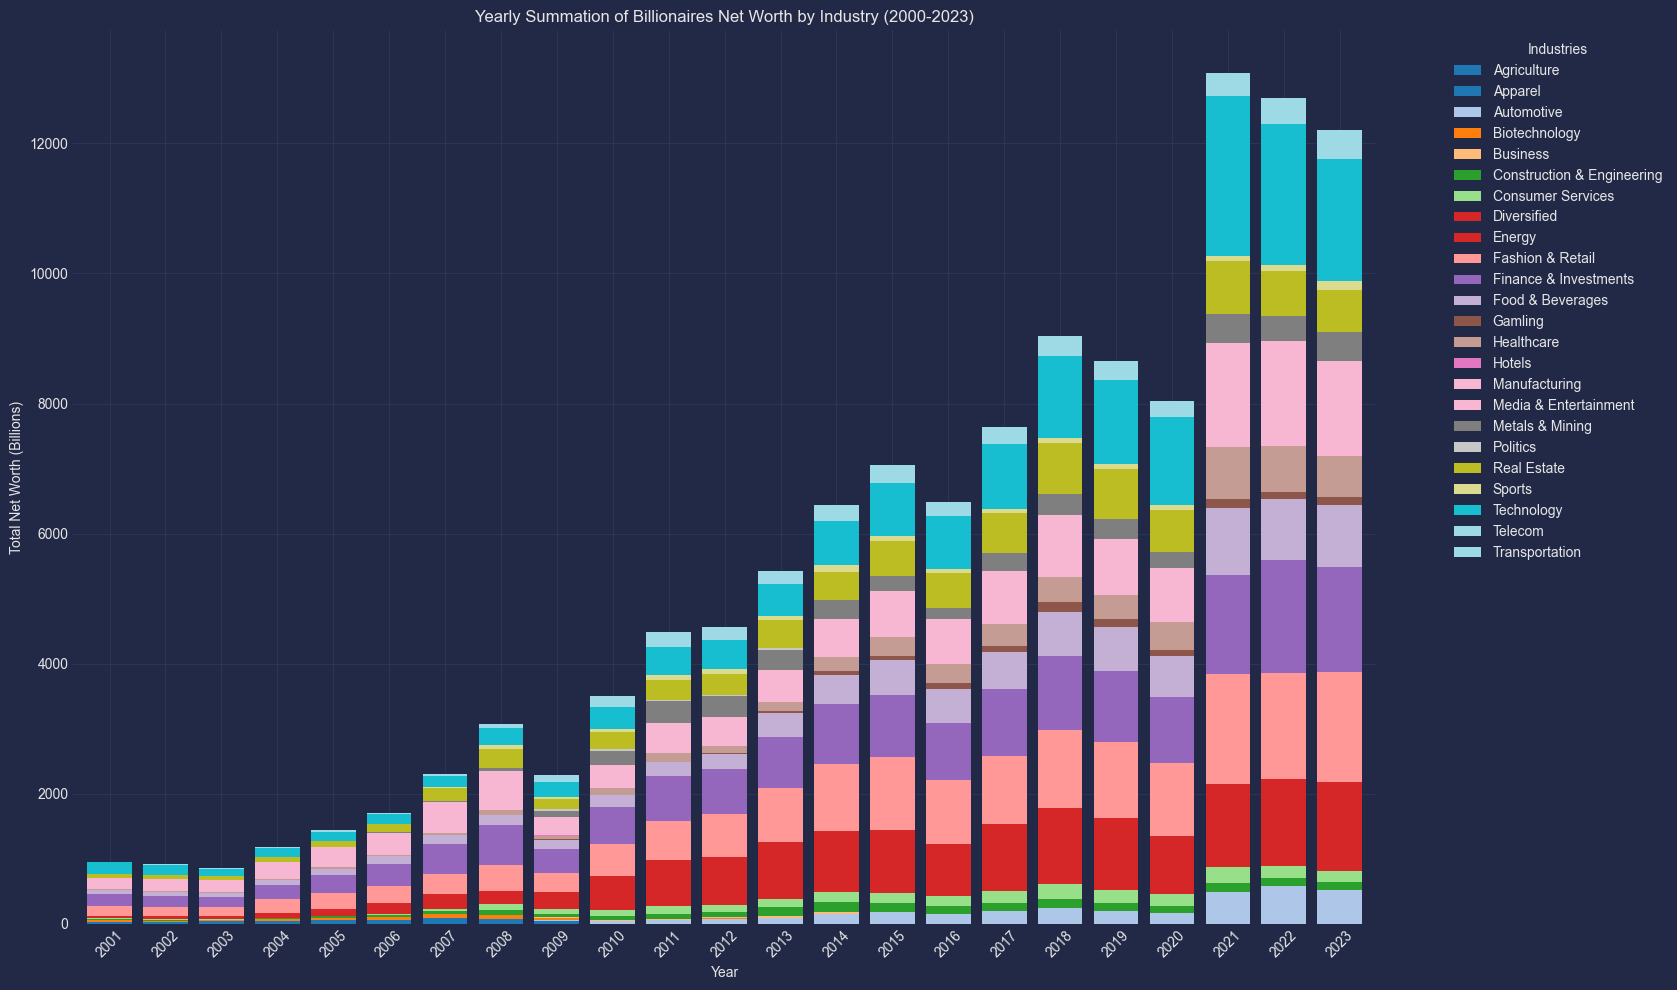

In [48]:
dataset2000_2023 = pd.read_csv('billionaires_2000_2023.csv')
dataset2000_2023 = dataset2000_2023[['year', 'full_name', 'net_worth', 'country_of_citizenship','business_industries']].dropna()

import ast  # Import the ast module to parse the string representation of the list
import mplcyberpunk
plt.style.use("cyberpunk")

def process_business_industries(row):
    # Check if the value in the 'business_industries' column is a string
    if isinstance(row['business_industries'], str):
        try:
            # Attempt to parse the string representation of the list
            industries_list = ast.literal_eval(row['business_industries'])
            # Check if it's a list and get the first value if available
            if isinstance(industries_list, list) and len(industries_list) > 0:
                return industries_list[0]
            else:
                return None  # Return None if not a list or list is empty
        except (ValueError, SyntaxError):
            return None  # Return None if parsing fails
    else:
        return row['business_industries']  # If it's already a non-string type, return it as is

# Apply the custom function to the 'business_industries' column
dataset2000_2023['business_industries'] = dataset2000_2023.apply(process_business_industries, axis=1)

def standardize_industries(df):
    # Replace HTML entities
    df['business_industries'] = df['business_industries'].str.replace('&#38;', '&', regex=False)

    # Define a dictionary for conditions and replacements
    replacements = {
        'Construction': 'Construction & Engineering',
        'Food': 'Food & Beverages',
        'Energy': 'Energy',
        'Retail': 'Fashion & Retail',
        'Finance': 'Finance & Investments',
        'Health': 'Healthcare',
        "Hotels": "Hotels",
        "Internet": 'Technology',
        "Investments": "Finance & Investments",
        'Food': 'Food & Beverage',
        'Media': 'Media & Entertainment',
        'Metals': 'Metals & Mining',
        'Real': 'Real Estate',
        'Software': 'Technology',
        'Technology': 'Technology',
        'Sports': 'Sports',
        'Telecom': 'Telecom',
        'Billionaire': "Diversified",
        'Beverage': 'Food & Beverages',
        'Services': 'Consumer Services',
        'Consumer': 'Consumer Services',
        'Casino':'Gamling',
        'Steel':'Metals & Mining',
        'Coal': 'Metals & Mining',
        'Service': 'Consumer Services',
        'Healthcare': 'Insurance',
        'Gaming': 'Sports',
        'Insurance': 'Healthcare',
        'Pharmaceuticals': 'Biotechnology',
        'Medicine': 'Biotechnology',
        'Oil': 'Energy',
        'Luxury Goods': 'Fashion & Retail',
        'Banks': 'Finance & Investments',
        'Celebrity': 'Media & Entertainment',
        'Shipping': 'Logistics',
        'Logistics': 'Transportation',
        'Electronics': 'Technology',
        'Chemicals': 'Metals & Mining',
        'Gambling': 'Sports',
        'Leisure': 'Hotels',

        # Add more conditions here as needed
    }

    # Iterate over the dictionary and replace values conditionally
    for key, value in replacements.items():
        df['business_industries'] = df['business_industries'].apply(
            lambda x: value if key in x else x
        )

    # Optionally, standardize to remove trailing whitespaces
    df['business_industries'] = df['business_industries'].str.strip()

    return df

standardize_industries(dataset2000_2023)

# Convert 'net_worth' to numeric
dataset2000_2023['net_worth'] = dataset2000_2023['net_worth'].str.rstrip('B').astype(float)
# Filter data for years between 2000 and 2022
filtered_df = dataset2000_2023[(dataset2000_2023['year'] >= 2001) & (dataset2000_2023['year'] <= 2023)]
# Group by 'year' and 'business_industries', and calculate the total net worth
industry_yearly_sum = filtered_df.groupby(['year', 'business_industries'])['net_worth'].sum().reset_index()
# Create a pivot table for the stacked bar chart
pivot_table = industry_yearly_sum.pivot(index='year', columns='business_industries', values='net_worth').fillna(0)
# Generate a color palette with a unique color for each industry
industries = pivot_table.columns
print(len(industries))
colors = plt.cm.get_cmap('tab20', len(industries)).colors  # 'tab20' colormap has 20 unique colors

# Ensure years are treated as categorical variables and set the x-ticks
pivot_table.index = pivot_table.index.astype(str)
year_labels = pivot_table.index

# Assuming 'pivot_table' is your DataFrame prepared for plotting.
# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the stacked bar chart with a smaller width
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(20, 10), width=0.8, color=colors)  # Adjust the width as needed

# Set x-ticks
ax.set_xticklabels(year_labels, rotation=45)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Net Worth (Billions)')
plt.title('Yearly Summation of Billionaires Net Worth by Industry (2000-2023)')

# Adjust legend
plt.legend(title='Industries', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


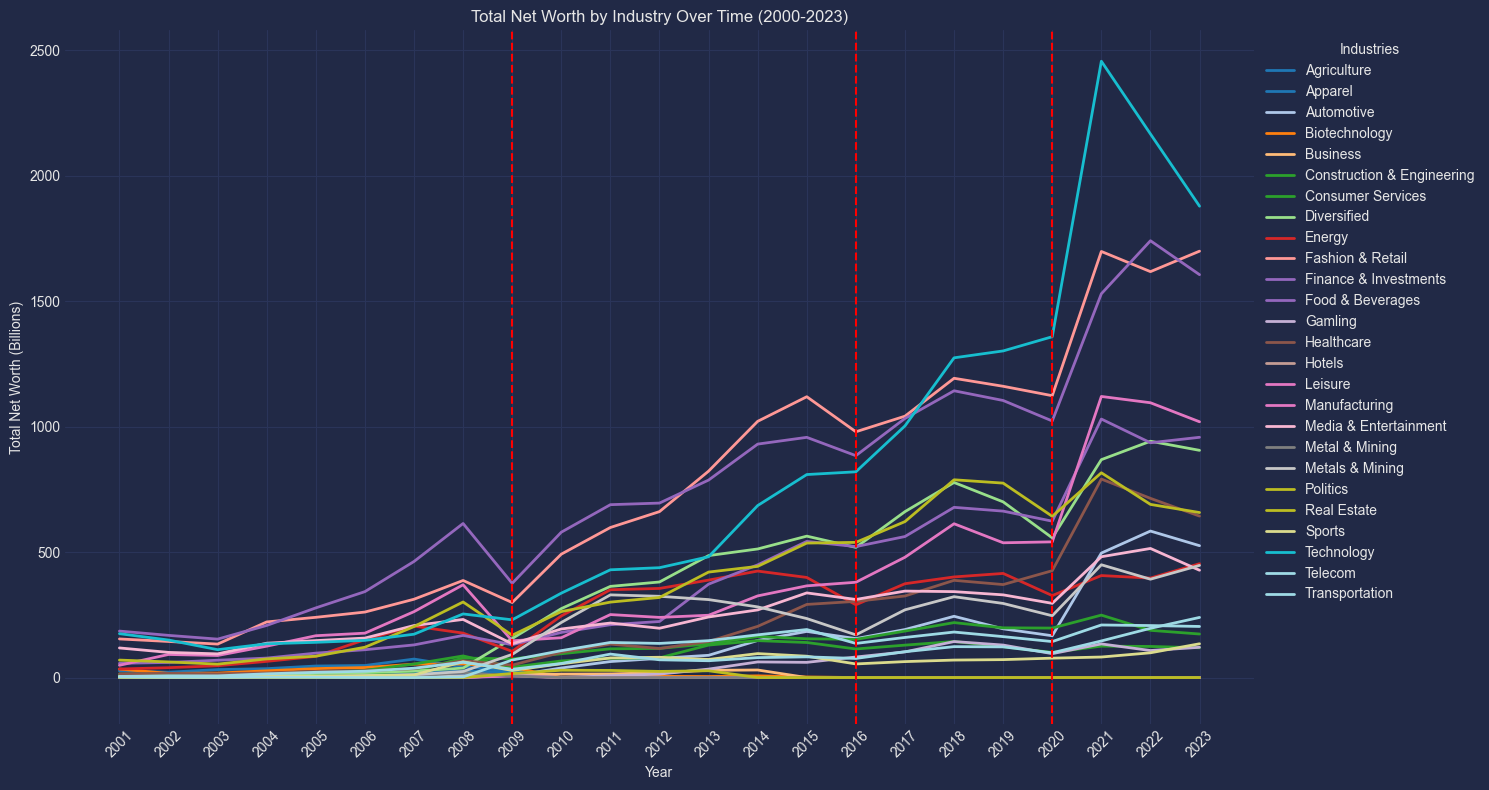

In [45]:
# Set the figure size
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed

num_colors = len(pivot_table.columns)
cm = plt.get_cmap('tab20')
colors = cm(np.linspace(0, 1, num_colors))

# Plot each industry as a separate line
for column, color in zip(pivot_table.columns, colors):
    plt.plot(pivot_table.index, pivot_table[column], marker='', color=color, linewidth=2, label=column)

# Set the title and labels
plt.title('Total Net Worth by Industry Over Time (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Total Net Worth (Billions)')

# Add grid lines to the plot for better readability
plt.grid(True)

# Adjust y-axis limits to position zero slightly below the middle
y_min, y_max = plt.ylim()
if y_min < 0:
    plt.ylim(bottom=y_min * 1.5)  # Adjust the lower bound if necessary

# Add a legend to the plot
# Adjust the location of the legend. If there are many industries, you might need to place the legend outside the plot.
plt.legend(title='Industries', loc='upper left', bbox_to_anchor=(1, 1))

# Ensure the x-axis labels (years) are displayed correctly and are readable
plt.xticks(rotation=45)

# Add red vertical lines for the years 2009, 2016, and 2020
plt.axvline(x='2009', color='red', linestyle='--')
plt.axvline(x='2016', color='red', linestyle='--')
plt.axvline(x='2020', color='red', linestyle='--')

# Show the plot
plt.tight_layout()  # This will adjust the plotting area to fit all labels and legends properly
plt.show()


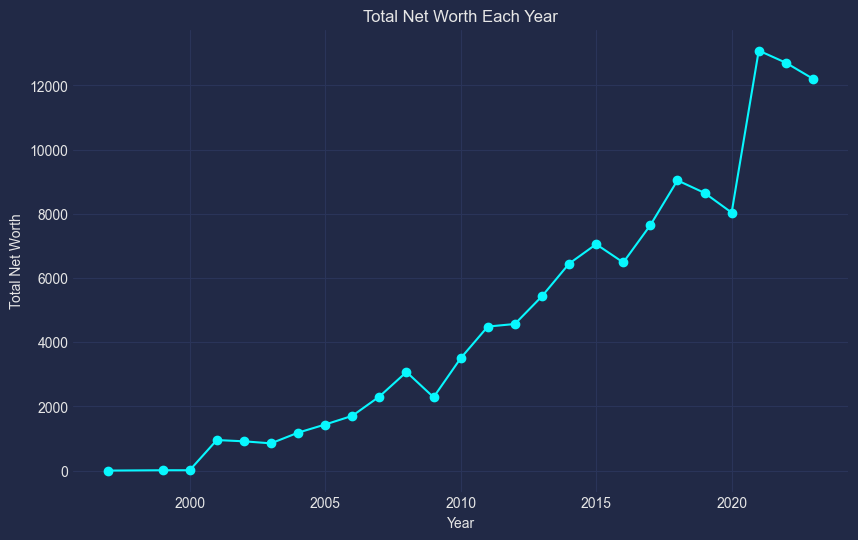

In [46]:
# Calculate the total net worth each year
total_net_worth = dataset2000_2023.groupby('year')['net_worth'].sum()

# Plot the total net worth
plt.figure(figsize=(10, 6))
plt.plot(total_net_worth.index, total_net_worth.values, marker='o')
plt.title('Total Net Worth Each Year')
plt.xlabel('Year')
plt.ylabel('Total Net Worth')
plt.grid(True)
plt.show()
